In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

In class we couldn´t really show ARIMA's power since it didn´t really worked out for stock time series. Does it work at all? It does! Today we will show what it really shines at.

$\texttt{pmdarima.auto_arima()}$ is really powerful, but it is **very** general. That's part of why there are many complications while using it, for choosing the right parameters is not an easy task. Sometimes the results are unacceptable, like what we got for the stocks times series.

The problem with plain ARIMA model is it does not support seasonality. And many time series (including some stocks), have some degree of seasonality. When the seasonality is very obvious, SARIMA is the star of the show. SARIMA is used basically the same as what what we did with auto_arima but with the parameter
$$\texttt{seasonal = True}$$

If the time series if clearly seasonal go for SARIMA which uses seasonal differencing.

Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms, you subtract the value from previous season. So, for example, normal differencing would be
$$ y_t' = y_t - y_{t - 1} $$
On the other hand, if our data is seasonal, we can difference with respect to value one season ago. If your data has anual seasonality for example, then you can take
$$ y_t' = y_t - y_{t - 12} $$

In this example we will study the sale of drugs, which we would expect to be seasonal (because people get more sick in winter or less sick in summer).

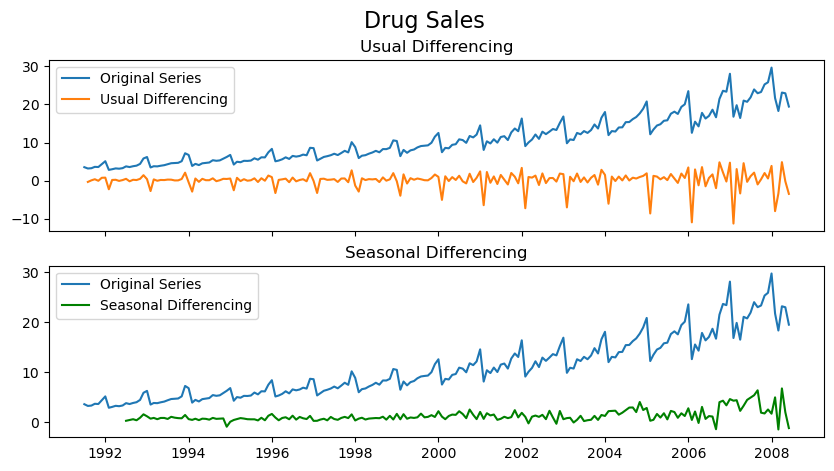

In [16]:
# Import data, we will study the sales of drugs
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Drug Sales', fontsize=16)
plt.show()

Now we can build the SARIMA model auto_arima(). To do that, we need to set $\texttt{seasonal=True}$, set the frequency $m=12$ for month wise series and enforce $D=1$ (which apparently is an standard trick when dealing with seasonal time series). **Note** that we were enforcing this parameters also with the stocks and that's part of why it didn't really worked out for us. The seasonality with stocks is not by any means monthly so $m$ shouldn´t be forced to be 12.

In [4]:
# We fit SARIMA with the correct parameters
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=0.70 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.42 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.28 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=2.90 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=0.64 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.875, Time=2.98 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.19 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=0.88 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.34 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.30 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -253.991
Date:                            Tue, 21 Jun 2022   AIC                            523.981
Time:                                    03:27:54   BIC                            550.041
Sample:                                         0   HQIC                           534.536
                                            - 204                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0053      0.009      0.565      0.572      -0.013       0.024
ar.L1          0.9754      0.019     51.314      0.000       0.938       1.013
ma.L1         -0.9099      0.057    -15.886      0.000      -1.022      -0.798
ma.L2          0.2238      0.059      3.778      0.000       0.108       0.340
ar.S.L12       0.8431      0.166      5.082      0.000       0.518       1.168
ma.S.L12      -1.5763      0.187     -8.448      0.000      -1.942      -1.211
ma.S.L24       0.7537      0.115      6.569      0.000       0.529       0.979
sigma2         0.7607      0.067     11.393      0.000       0.630       0.892
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               145.11
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):              14.45   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

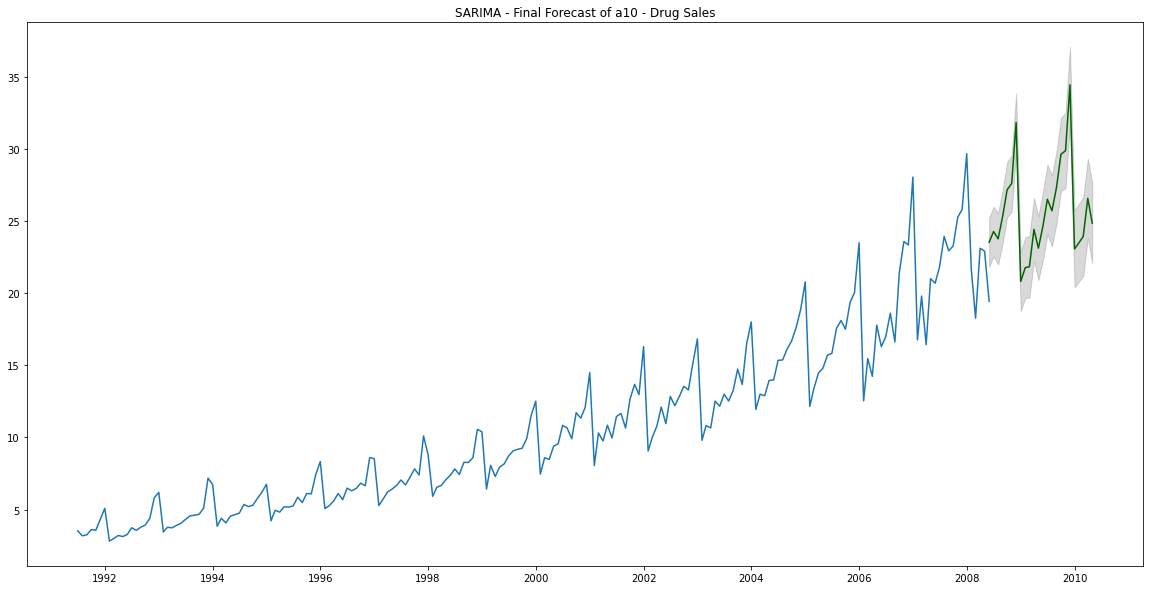

In [14]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()